In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline

In [3]:
from sklearn import linear_model
from sklearn import svm
from sklearn import metrics
from sklearn import cluster
from sklearn import naive_bayes
from sklearn import neural_network
from sklearn import ensemble
from sklearn.externals import joblib

import pandas as pd
import numpy as np

import zipfile
import os
import gc

import lightgbm as lgb
from lightgbm import Dataset

# 训练

In [3]:
df_train_interaction = pd.read_table(
    '../data1/train_interaction_000_002.txt', 
    names=['user_id', 'photo_id', 'click', 'like', 'follow', 'time', 'playing_time', 'duration_time', 'activity', 'mean']
)
df_train_interaction.head()

,user_id,photo_id,click,like,follow,time,playing_time,duration_time,activity,mean
0,37431,4634209,1,0,0,761068790673,1,17,0.018257,0.360563
1,37431,1792827,1,0,0,761067070475,2,23,0.018257,0.360563
2,37431,2434713,0,0,0,761043451450,0,16,0.018257,0.360563
3,37431,3998155,1,0,0,761068790673,12,11,0.018257,0.360563
4,37431,1793349,1,0,0,761043997858,9,11,0.018257,0.360563


In [4]:
df_train_visual = pd.read_table(
    '../data1/train_visual_000_002.txt',
    header = None
)
df_train_visual.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.379524,0.070647,0.076638,0.275681,1.226613,0.193970,0.242775,0.405643,0.053296,0.230462,...,0.409435,0.018522,0.055796,0.040563,0.234662,0.482360,1.178618,0.049136,0.065847,0.248399
1,0.111587,0.388851,0.031677,0.075973,0.207334,0.229689,0.283281,0.188244,0.223518,0.043784,...,0.096185,0.032350,0.226936,0.090192,0.485411,0.202011,0.789261,0.100794,0.000000,0.281388
2,0.068803,0.548732,0.030362,0.189058,0.365160,0.085679,0.107933,0.909248,0.043536,0.201542,...,0.174621,0.435897,0.000000,0.116856,0.236042,0.722318,0.196697,0.205278,0.316059,0.382032
3,0.349143,0.224708,0.168317,0.588925,0.458902,0.235370,0.038113,0.693623,0.008700,0.167651,...,0.291763,1.085078,0.026809,0.381866,0.343808,0.886710,0.594916,0.586105,0.090885,0.778998
4,0.542761,0.140384,0.082603,0.178404,0.160813,0.380198,0.219815,0.508950,0.155591,0.657693,...,0.338272,0.766638,0.161643,0.199972,0.279232,0.269324,0.654554,0.261339,0.211313,0.530757


In [18]:
df_train = pd.concat([df_train_interaction[['click', 'activity', 'mean']], df_train_visual], axis=1)
df_train.head()

,click,activity,mean,0,1,2,3,4,5,6,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,1,0.018257,0.360563,0.379524,0.070647,0.076638,0.275681,1.226613,0.193970,0.242775,...,0.409435,0.018522,0.055796,0.040563,0.234662,0.482360,1.178618,0.049136,0.065847,0.248399
1,1,0.018257,0.360563,0.111587,0.388851,0.031677,0.075973,0.207334,0.229689,0.283281,...,0.096185,0.032350,0.226936,0.090192,0.485411,0.202011,0.789261,0.100794,0.000000,0.281388
2,0,0.018257,0.360563,0.068803,0.548732,0.030362,0.189058,0.365160,0.085679,0.107933,...,0.174621,0.435897,0.000000,0.116856,0.236042,0.722318,0.196697,0.205278,0.316059,0.382032
3,1,0.018257,0.360563,0.349143,0.224708,0.168317,0.588925,0.458902,0.235370,0.038113,...,0.291763,1.085078,0.026809,0.381866,0.343808,0.886710,0.594916,0.586105,0.090885,0.778998
4,1,0.018257,0.360563,0.542761,0.140384,0.082603,0.178404,0.160813,0.380198,0.219815,...,0.338272,0.766638,0.161643,0.199972,0.279232,0.269324,0.654554,0.261339,0.211313,0.530757


In [ ]:
df_train.to_csv('../data1/train_000_002.txt', index=False, header=False, sep='\t')

In [7]:
# # 生成二进制训练集：
# X_train = df_train.drop(columns=['click']).values
# y_train = df_train['click'].values

In [15]:
# lgb.Dataset(X_train, y_train).save_binary('../data1/train_000_002.bin')

In [ ]:
# del df_train_interaction
# del df_train_visual
# del df_train
# del X_train
# del y_train
# gc.collect()

In [ ]:
# 训练
!../bin/lightgbm \
    config=../conf/train.conf data=../data1/train_000_002.txt \
    output_model=../out/model_000_002.txt \

[LightGBM] [Info] Finished loading parameters
[LightGBM] [Info] Using column number 2 as label
[LightGBM] [Warning] File ../data1/train_000_002.txt.bin exists, cannot save binary to it
[LightGBM] [Info] Finished loading data in 2.803268 seconds
[LightGBM] [Info] Number of positive: 201842, number of negative: 298485
[LightGBM] [Info] Total Bins 522704
[LightGBM] [Info] Number of data: 500327, number of used features: 2050
[LightGBM] [Info] Finished initializing training
[LightGBM] [Info] Started training...
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.403420 -> initscore=-0.391234
[LightGBM] [Info] Start training from score -0.391234
[LightGBM] [Info] Iteration:1, training auc : 0.598448
[LightGBM] [Info] 8.985364 seconds elapsed, finished iteration 1
[LightGBM] [Info] Iteration:2, training auc : 0.658062
[LightGBM] [Info] 15.373565 seconds elapsed, finished iteration 2
[LightGBM] [Info] Iteration:3, training auc : 0.664221
[LightGBM] [Info] 21.163842 seconds elapsed, finished ite

In [ ]:
# # 继续训练：
# !../bin/lightgbm \
#     config=../conf/train.conf data=../data1/train_000_002.bin \
#     output_model=../out/model_000_002_2.txt \
#     input_model=../out/model_000_002.txt

In [ ]:
# X_train = df_train.drop(
#     labels=['user_id', 'photo_id', 'click', 'like', 'follow', 'time', 'playing_time', 'duration_time'],
#     axis=1
# ).values

# y_train = df_train['click'].values

In [ ]:
# # 训练
# clf = ensemble.GradientBoostingClassifier()
# clf.fit(X_train, y_train)
# joblib.dump(clf, '../out/model_visual_random.gb')

In [ ]:
# # LightGBM
# lgb_train = lgb.Dataset(X_train, y_train)

In [ ]:
# params = {
#     'task': 'train',
#     'application': 'binary',
#     'boosting_type': 'gbdt',
#     'learning_rate': 0.05,
#     'num_leaves': 128,
#     'tree_learner': 'serial',
#     'num_threads': 2,
#     'device': 'cpu',
#     'feature_fraction': 0.8,
# #     'bagging_fraction': 0.8,
# #     'bagging_freq': 10,
#     'save_binary': True,
    
#     'is_unbalance': True,
    
#     'metric': {'auc'},
#     'verbose': 0,
    
#     'data': '../data1/train_random.txt'
# }
# gbm = lgb.train(params, lgb_train, num_boost_round=100)

In [138]:
# gbm.save_model('../out/model_visual_random.lgb')

# 预测

In [4]:
# user_id photo_id click like follow time playing_time duration_time activity mean
df_valid = pd.read_table(
    '../data1/valid_000_002.txt',
    header=None
)
df_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,2048,2049,2050,2051,2052,2053,2054,2055,2056,2057
0,37431,7310980,1,1,0,761043772978,18,17,0.018257,0.360563,...,0.307630,0.774571,0.036118,0.907106,0.357271,0.053098,0.655818,0.324319,0.142039,0.285091
1,37431,7402131,1,0,0,761085134188,7,11,0.018257,0.360563,...,0.531529,0.580235,0.088580,0.693396,0.005656,0.148244,0.429536,0.067499,0.000000,0.014602
2,37431,7344307,0,0,0,761067624245,0,17,0.018257,0.360563,...,0.074786,0.073850,0.000000,0.620435,0.728884,0.546118,0.199200,0.629555,0.153588,0.502104
3,37431,7063032,1,0,0,761085134188,8,11,0.018257,0.360563,...,0.922180,0.533644,0.000966,0.000000,0.285188,0.132471,0.453870,0.589791,0.363919,0.477856
4,37431,6880850,0,0,0,761043451450,0,375,0.018257,0.360563,...,0.891953,1.081137,0.037570,0.250987,1.460434,0.234496,0.322408,0.036280,0.022645,0.044960


In [6]:
X_valid = df_valid.drop(columns=[0,1,2,3,4,5,6,7]).values
y_valid = df_valid[2].values

In [4]:
gbm = lgb.Booster(model_file='../out/model_000_002.txt')

In [24]:
features = gbm.feature_importance()

In [31]:
features[features >= 20]

array([ 62, 374,  22,  71,  24,  99,  90,  95,  28,  21,  21,  31,  25,
        46,  53,  39,  26,  40,  23,  72,  23,  48,  22,  32,  25,  39,
        46,  23,  20,  21,  67,  46,  28,  26,  91,  33,  40,  37,  24,
        49,  35,  52,  27,  26,  34,  20,  36,  22,  20,  21,  24,  21,
        31,  26,  26,  25,  30,  22,  36,  22,  27,  23])

In [ ]:
y_pred = gbm.predict(X_valid, num_iteration=gbm.best_iteration)
print(y_pred)
metrics.roc_auc_score(y_valid, y_pred)

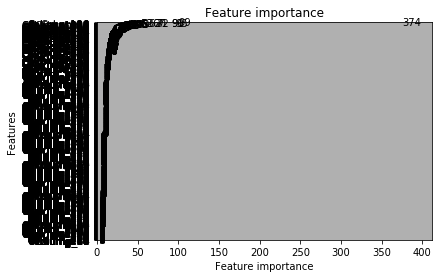

In [17]:
lgb.plot_importance(gbm)

ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

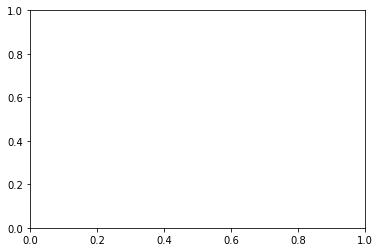

In [20]:
lgb.plot_tree(gbm)

# 评分

In [66]:
metrics.roc_auc_score(y_valid, y_pred)

0.524237711814649

In [67]:
metrics.roc_auc_score(y_valid, y_pred_proba[:, 1])

0.7499488756498498

In [18]:
metrics.roc_auc_score(y_valid, y_pred_gbm)

0.7573279281716649

0.760398115592365 - 128
0.7616071056788016 - 128 unbalance 
0.7613787315212628 - 128 unbalance 120

In [ ]:
valid_df1 = pd.read_table(
    '../data1/valid_interaction.txt',
    names=['user_id', 'photo_id', 'click', 'like', 'follow', 'time', 'playing_time', 'duration_time']
)[['user_id', 'photo_id', 'click']]

In [ ]:
train_df.groupby('user_id').count().sort_values('photo_id')

In [8]:

user_id=26380

user_train_df = train_df[train_df['user_id'] == user_id][['photo_id', 'click']]
print(user_train_df.shape)
# 特征：
user_train_X = get_train_visual_datas(user_train_df['photo_id'].values)
# 降维：
# user_train_X = visual_reduce(user_train_X)
print(user_train_X.shape)


(17461, 2)
(17461, 2048)


In [ ]:
# # 样本聚类：
# cls = cluster.KMeans(128, n_jobs=-1)
# cls.fit(user_train_X)

In [ ]:
# cls.predict(user_train_X)

In [9]:
# X = cls.predict(user_train_X).reshape(-1, 1)
X = user_train_X
y = user_train_df['click'].values

click_mean = user_train_df['click'].mean()

In [ ]:
# clf = linear_model.LogisticRegressionCV(random_state=0, penalty='l1', solver='liblinear') # 低效
clf = linear_model.LogisticRegressionCV(random_state=0, n_jobs=-1) 
# clf = linear_model.LogisticRegression(random_state=0, penalty='l2', solver='saga', C=10.0, n_jobs=-1, class_weight='balanced')
# clf = linear_model.BayesianRidge()
# clf = svm.SVC(probability=True)
# clf = naive_bayes.GaussianNB(priors=[1-click_mean, click_mean])
# clf = naive_bayes.MultinomialNB(alpha=0.01)
# clf = neural_network.MLPClassifier(solver='adam', activation='logistic', hidden_layer_sizes=(100, 100), random_state=1)
clf.fit(X, y)

In [11]:
user_valid_df = valid_df[valid_df['user_id'] == user_id][['photo_id']]
user_valid_X = get_train_visual_datas(user_valid_df['photo_id'].values)
# user_valid_X = visual_reduce(user_valid_X)
print(user_valid_X.shape)

(1984, 2048)


In [12]:
# X1 = cls.predict(user_valid_X).reshape(-1, 1)
X1 = user_valid_X
y1 = clf.predict_proba(X1)[:, 1]
# y1 = clf.predict_log_proba(X1)[:, 1]
# y1 = clf.predict(X1)
# pred = clf.predict(user_valid_X)
print(y1)
valid = valid_df[valid_df['user_id'] == user_id]['click'].values
print(valid)
metrics.roc_auc_score(valid, y1)

[4.01345369e-15 4.08279539e-01 5.18498572e-12 ... 4.83755654e-11
 1.08576868e-13 5.05841043e-07]
[0 0 0 ... 0 0 0]


0.5375859634041508

In [20]:
%run evaluation_script.py ../out/pred_user_visual.txt ../out/valid.txt

{'code': 0, 'message': 'validation success'}
{'code': 0, 'score': 0.7290092330885755, 'message': 'success'}
